# Source of The Dataset
* Own dataset

In [1]:
# loadin important libraries

from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

smt = SMOTE(random_state=12)

In [2]:
# read the dataset 

df = pd.read_csv('Depression.csv')
print(df.shape)
df.head()

(758, 35)


,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,meditation,video games,study hours,phone hours,medication,movies per week,music hours,depression,category,verdict
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,Not at all,Not at all,2,6 to 8,No,0,0,18,Moderately Severe,Yes
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,Sometimes,Sometimes,4,0 to 2,No,5,0,1,None,No
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,Not at all,Not at all,3,6 to 8,No,0,0,21,Severe,Yes
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,Not at all,Very Often,1,0 to 2,No,5,0,23,Severe,Yes
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,Not at all,Very Often,2,6 to 8,No,1,4,19,Moderately Severe,Yes


In [3]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  mood  has  5  unique values ---->  ['Tensed' 'Sad' 'Lost' 'Happy' 'Angry']
Feature  age  has  16  unique values
Feature  gender  has  3  unique values ---->  ['Female' 'Male' 'Others']
Feature  subject  has  70  unique values
Feature  semester  has  22  unique values
Feature  sibilings  has  13  unique values
Feature  living  has  2  unique values ---->  ['With family' 'Without family']
Feature  employment  has  3  unique values ---->  ['Part time' 'None' 'Full time']
Feature  personality  has  3  unique values ---->  ['Extrovert' 'Ambivert' 'Introvert']
Feature  relationship  has  5  unique values ---->  ['In a relationship' 'Single' 'Engaged' 'Divorced' 'Married']
Feature  wakeup  has  76  unique values
Feature  breakfast  has  71  unique values
Feature  launch  has  58  unique values
Feature  dinner  has  27  unique values
Feature  sleep  has  65  unique values
Feature  hobbies  has  187  unique values
Feature  smoker  has  2  unique values ---->  ['No' 'Yes']
Feature  alch

# Data Visualization

<AxesSubplot:xlabel='depression', ylabel='Proportion'>

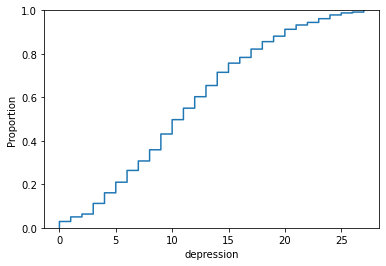

In [4]:
sns.ecdfplot(x = 'depression', data = df)

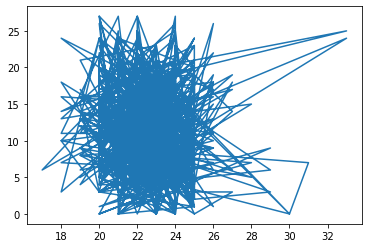

In [5]:
x = df['age']
y = df['depression']
plt.plot(x, y)

<AxesSubplot:xlabel='gender', ylabel='depression'>

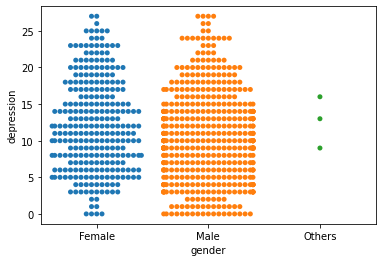

In [6]:
sns.swarmplot(y = 'depression', x = 'gender', data = df)

<AxesSubplot:xlabel='gender', ylabel='depression'>

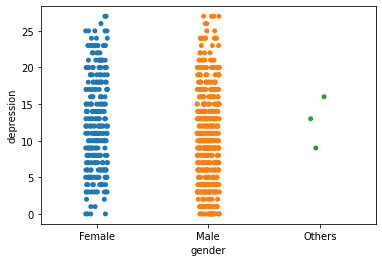

In [7]:
sns.stripplot(y = 'depression', x = 'gender', data = df)

<AxesSubplot:xlabel='depression', ylabel='Proportion'>

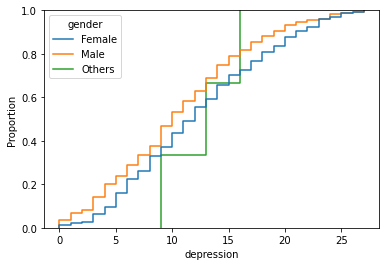

In [8]:
sns.ecdfplot(x = 'depression', data = df, hue = 'gender')

<AxesSubplot:xlabel='depression', ylabel='Count'>

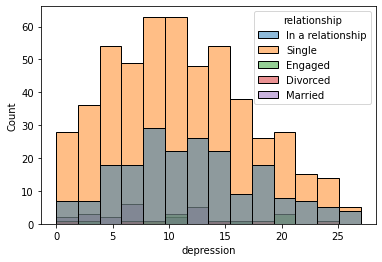

In [9]:
sns.histplot(x = 'depression', data = df, hue = 'relationship')

<AxesSubplot:xlabel='depression', ylabel='age'>

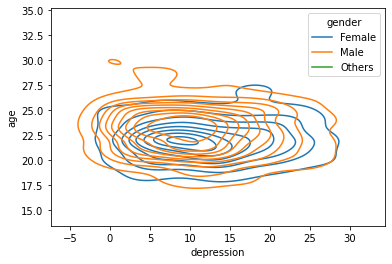

In [10]:
sns.kdeplot(x = 'depression', y = 'age', hue = 'gender', data = df)

In [11]:
import collections

a = df['category']
counter = collections.Counter(a)
print(counter)
values = counter.values()
print(values)
keys = counter.keys()
print(keys)
print(counter.most_common(3))
print(dict(counter))

Counter({'Moderate': 215, 'Mild': 205, 'Moderately Severe': 126, 'None': 122, 'Severe': 90})
dict_values([126, 122, 90, 215, 205])
dict_keys(['Moderately Severe', 'None', 'Severe', 'Moderate', 'Mild'])
[('Moderate', 215), ('Mild', 205), ('Moderately Severe', 126)]
{'Moderately Severe': 126, 'None': 122, 'Severe': 90, 'Moderate': 215, 'Mild': 205}


([<matplotlib.patches.Wedge at 0x1c76879c880>,
 [Text(0.9533868822548479, 0.5486833811447008, 'Moderately Severe'),
  Text(0.02279358610591973, 1.099763816659028, 'None'),
  Text(-0.8321382334339209, 0.7194066725138666, 'Severe'),
  Text(-0.9370694660790571, -0.5761083368102836, 'Moderate'),
  Text(0.7262795594920571, -0.8261464770027308, 'Mild')],
 [Text(0.5200292085026442, 0.29928184426074583, '16.6%'),
  Text(0.012432865148683489, 0.5998711727231062, '16.1%'),
  Text(-0.45389358187304774, 0.3924036395530181, '11.9%'),
  Text(-0.5111287996794855, -0.3142409109874274, '28.4%'),
  Text(0.39615248699566746, -0.45062535109239854, '27.0%')])

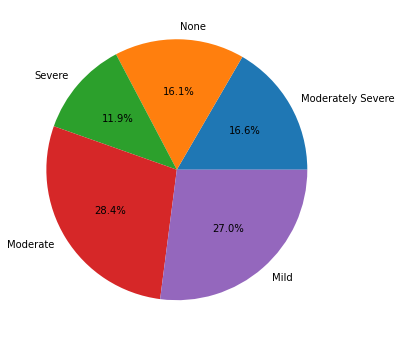

In [12]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.pie(values, labels=keys, autopct='%1.1f%%')

# Data Pre-Processing Phase

In [13]:
# checing for null values
df.isnull().sum()

mood               0
age                0
gender             0
subject            0
semester           0
sibilings          0
living             0
employment         0
personality        0
relationship       0
wakeup             0
breakfast          0
launch             0
dinner             0
sleep              0
hobbies            0
smoker             0
alcholic           0
drug addicted      0
friends            0
hangout            0
social events      0
pray               0
sports             0
exercise           0
meditation         0
video games        0
study hours        0
phone hours        0
medication         2
movies per week    0
music hours        0
depression         0
category           0
verdict            0
dtype: int64

In [14]:
# remove null entries
df.dropna(inplace = True)

# remove duplicate entries, if any
df.drop_duplicates(inplace = True)

print(df.shape)

(756, 35)


In [15]:
df.describe()

,age,semester,sibilings,friends,study hours,music hours,depression
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,22.543651,7.947090,1.746032,3.776455,2.792328,1.723545,11.177249
std,2.006466,4.809191,1.421331,5.067651,2.201864,1.871084,6.307385
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,2.000000,1.000000,1.000000,6.000000
50%,22.000000,8.000000,1.000000,3.000000,2.000000,1.000000,11.000000
75%,24.000000,11.000000,2.000000,5.000000,4.000000,2.000000,15.000000
max,33.000000,83.000000,20.000000,100.000000,10.000000,10.000000,27.000000


In [16]:
# observe dataset and check for outliers
for cols in df.columns:
    print(str(df[cols].value_counts()) + '\n')

Happy     286
Tensed    186
Lost      156
Sad       108
Angry      20
Name: mood, dtype: int64

22    144
23    143
21    133
24    115
25     81
20     74
19     21
26     17
18     10
27      6
28      3
29      3
30      2
33      2
17      1
31      1
Name: age, dtype: int64

Male      475
Female    278
Others      3
Name: gender, dtype: int64

Engineering                       384
Business                          206
Pharmacy                           28
MBBS                               16
Law                                15
                                 ... 
Biochemistry and biotechnology      1
Political Science                   1
Marketing                           1
life sciences                       1
Mathematics                         1
Name: subject, Length: 70, dtype: int64

5     108
11     95
12     85
8      68
10     56
1      48
4      47
7      40
2      39
9      38
6      35
13     29
3      27
14     20
15      9
16      5
17      2
19      1
20      1


In [17]:
# settin limits for features
limit = {
    'age': 27,
    'semester': 17,
    'sibilings': 6,
    'friends': 15,
}

# drop rows where limit exceed for features
for feature in limit:
    index = df.index[df[feature] > limit[feature]].tolist()
    df.drop(index = index, inplace = True)
    
print(df.shape)

(732, 35)


In [18]:
# Convert Catergorical values to numeric representation
df['pray'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['sports'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['hangout'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['exercise'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['meditation'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['video games'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['social events'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['phone hours'].replace({'0 to 2': 0, '3 to 5': 1, '6 to 8':2, 'more than 8':3}, inplace = True)
df.head()

,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,meditation,video games,study hours,phone hours,medication,movies per week,music hours,depression,category,verdict
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,0,0,2,2,No,0,0,18,Moderately Severe,Yes
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,1,1,4,0,No,5,0,1,None,No
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,0,0,3,2,No,0,0,21,Severe,Yes
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,0,3,1,0,No,5,0,23,Severe,Yes
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,0,3,2,2,No,1,4,19,Moderately Severe,Yes


In [19]:
# selecting categorical features where unique values <= 6
cat_features = []
for cols in df.columns:
    unique_vals = df[cols].unique()
    if df[cols].dtype != np.int64 and len(unique_vals) <= 6:
        cat_features.append(cols)

cat_features.remove('category')  # target column for category prediction
cat_features.remove('verdict')  # target column for binary prediction
# cat_features.append('subject')  # confused what to do with this feature!
cat_features

['mood',
 'gender',
 'living',
 'employment',
 'personality',
 'relationship',
 'smoker',
 'alcholic',
 'drug addicted',
 'medication']

In [20]:
# convert categorical values to numeric representation
df = pd.get_dummies(data = df, columns = cat_features)
df.head()

,age,subject,semester,sibilings,wakeup,breakfast,launch,dinner,sleep,hobbies,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
0,24,Engineering,9,3,11:20:00 AM,1:10:00 AM,4:20:00 PM,9:20:00 PM,4:20:00 AM,Sleeping,...,0,0,1,0,1,0,1,0,1,0
1,23,Engineering,11,3,12:00:00 PM,12:15:00 PM,4:30:00 PM,10:30:00 PM,4:00:00 AM,Traveling,...,0,1,0,1,1,0,1,0,1,0
2,19,Pharmacy,3,0,8:30:00 AM,10:00:00 AM,3:00:00 PM,10:00:00 PM,1:00:00 AM,"Music, Painting",...,0,1,1,0,1,0,1,0,1,0
3,23,Engineering,13,1,2:00:00 PM,3:00:00 PM,7:00:00 PM,12:00:00 AM,3:00:00 AM,"Music, Programming",...,0,0,1,0,1,0,1,0,1,0
4,22,Engineering,11,1,11:00:00 AM,11:30:00 AM,3:00:00 PM,11:30:00 PM,3:30:00 AM,Music,...,0,1,0,1,1,0,1,0,1,0


In [21]:
df.describe()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
count,732.000000,732.00000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,22.423497,7.79918,1.653005,3.505464,1.375683,1.147541,1.254098,0.468579,0.769126,0.247268,...,0.027322,0.696721,0.737705,0.262295,0.911202,0.088798,0.975410,0.024590,0.857923,0.142077
std,1.791726,3.82902,1.023569,2.733733,0.838283,0.861127,0.632821,0.573321,0.651193,0.476886,...,0.163133,0.459989,0.440183,0.440183,0.284646,0.284646,0.154978,0.154978,0.349367,0.349367
min,17.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.00000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,22.000000,8.00000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,11.00000,2.000000,5.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,27.000000,17.00000,6.000000,15.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling

In [22]:
# decide what to do with subjec, time columns, hobbies, and movies per week
X = df.drop(columns = ['subject', 'wakeup', 'breakfast', 'launch', 'dinner', 'sleep', 'hobbies', 'movies per week', 'depression', 'category', 'verdict', ]) # X contains the features 
y = df['category']  # for specific class prediction
print(X.shape)
X.head()

(732, 43)


,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
0,24,9,3,2,1,3,2,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,23,11,3,4,2,1,2,1,2,1,...,0,1,0,1,1,0,1,0,1,0
2,19,3,0,4,1,1,2,0,1,0,...,0,1,1,0,1,0,1,0,1,0
3,23,13,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,22,11,1,5,1,1,1,1,1,0,...,0,1,0,1,1,0,1,0,1,0


In [23]:
x.describe()

count    758.000000
mean      22.544855
std        2.004610
min       17.000000
25%       21.000000
50%       22.000000
75%       24.000000
max       33.000000
Name: age, dtype: float64

In [24]:
scale_vars = []
for cols in X.columns:
    if X[cols].dtype == np.int64 and X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['age',
 'semester',
 'sibilings',
 'friends',
 'hangout',
 'social events',
 'pray',
 'sports',
 'exercise',
 'meditation',
 'video games',
 'study hours',
 'phone hours',
 'music hours']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 20)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(622, 43)
(110, 43)


,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
412,21,5,1,3,0,0,2,0,1,0,...,0,1,1,0,1,0,1,0,1,0
31,22,6,1,3,2,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
624,21,5,1,1,0,2,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
730,23,8,1,2,1,2,2,0,0,0,...,0,1,1,0,1,0,1,0,1,0
387,22,11,3,2,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [26]:
# # Using SMOTE
# print(collections.Counter(y_train))
# X_train, y_train = smt.fit_resample(X_train, y_train)
# print(collections.Counter(y_train))

In [27]:
# using min_max scaler to scale features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [28]:
X_train.head()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
412,0.4,0.2500,0.166667,0.200000,0.000000,0.000000,1.0,0.0,0.5,0.0,...,0,1,1,0,1,0,1,0,1,0
31,0.5,0.3125,0.166667,0.200000,0.666667,0.333333,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
624,0.4,0.2500,0.166667,0.066667,0.000000,0.666667,0.5,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
730,0.6,0.4375,0.166667,0.133333,0.333333,0.666667,1.0,0.0,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
387,0.5,0.6250,0.500000,0.133333,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0


In [29]:
X_test.head()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
293,0.7,0.3750,0.333333,0.000000,0.333333,0.333333,0.5,0.0,0.5,0.5,...,0,0,0,1,1,0,1,0,0,1
469,0.5,0.1875,0.000000,0.666667,0.333333,0.666667,1.0,0.0,0.5,0.0,...,0,0,1,0,1,0,1,0,0,1
276,0.1,0.0000,0.333333,0.666667,0.666667,0.333333,1.0,0.5,0.5,0.5,...,0,0,1,0,1,0,1,0,1,0
279,0.8,0.0000,0.333333,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.5,...,0,0,1,0,1,0,1,0,1,0
124,0.4,0.6250,0.166667,0.333333,1.000000,0.333333,0.0,0.5,0.5,0.0,...,0,1,0,1,0,1,1,0,1,0


# Feature Selection

In [30]:
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

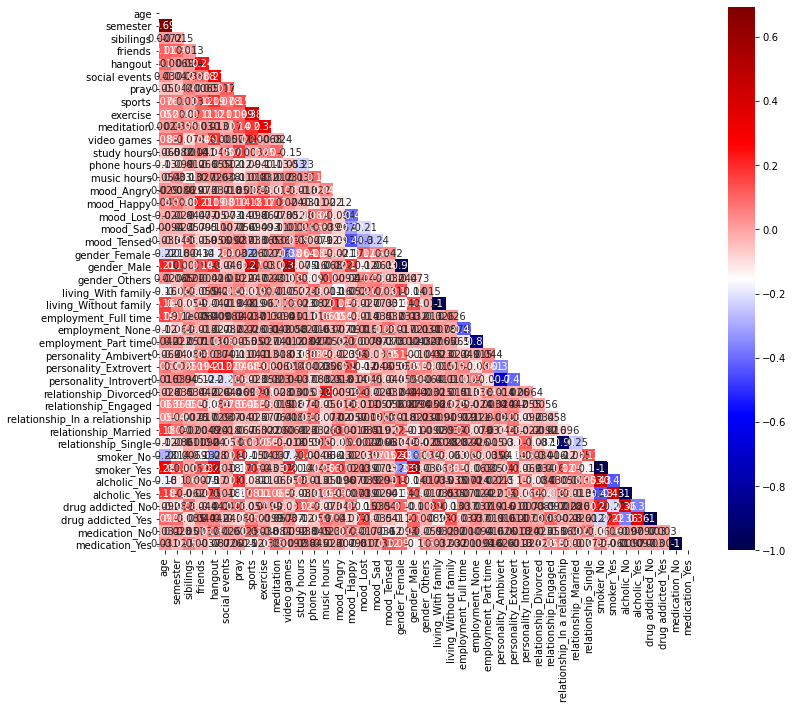

In [31]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [32]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(X_train, 0.87) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

7
{'smoker_Yes', 'relationship_Single', 'living_Without family', 'drug addicted_Yes', 'gender_Male', 'alcholic_Yes', 'medication_Yes'}


In [34]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(622, 36)
(110, 36)


# Model Creation and Evaluation(Predict Specific Category)

In [35]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.2797427652733119
Test Accuracy:  0.32727272727272727


Depth =  2 , Training Accuracy =  0.3536977491961415 , Test Accuracy =  0.32727272727272727 , Diff =  2.6425021923414227  %
Depth =  3 , Training Accuracy =  0.3665594855305466 , Test Accuracy =  0.37272727272727274 , Diff =  0.6167787196726116  %
Depth =  4 , Training Accuracy =  0.4067524115755627 , Test Accuracy =  0.3181818181818182 , Diff =  8.857059339374452  %
Depth =  5 , Training Accuracy =  0.45980707395498394 , Test Accuracy =  0.34545454545454546 , Diff =  11.435252850043847  %
Depth =  6 , Training Accuracy =  0.5160771704180064 , Test Accuracy =  0.2727272727272727 , Diff =  24.334989769073367  %
Depth =  7 , Training Accuracy =  0.5819935691318328 , Test Accuracy =  0.2818181818181818 , Diff =  30.017538731365097  %
Depth =  8 , Training Accuracy =  0.6463022508038585 , Test Accuracy =  0.32727272727272727 , Diff =  31.902952353113122  %
Depth =  9 , Training Accuracy =  0.7347266881028939 , Test Accuracy =  0.2909090909090909 , Diff =  44.3817597193803  %
Depth =  10 , 

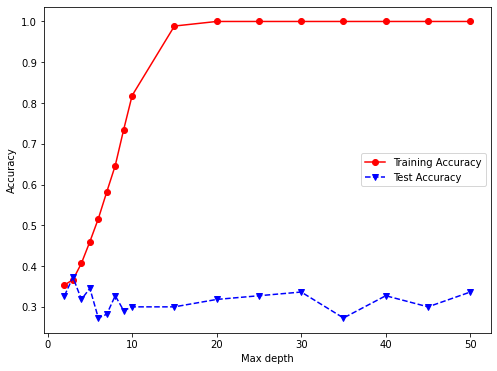

In [36]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1


#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.2909090909090909 , Difference =  70.9090909090909 %
K =  5 , Training Accuracy =  0.4967845659163987  Test Accuracy =  0.2818181818181818 , Difference =  21.49663840982169 %
K =  10 , Training Accuracy =  0.4340836012861736  Test Accuracy =  0.3181818181818182 , Difference =  11.590178310435546 %
K =  15 , Training Accuracy =  0.40353697749196143  Test Accuracy =  0.3181818181818182 , Difference =  8.535515931014325 %
K =  20 , Training Accuracy =  0.3745980707395498  Test Accuracy =  0.3 , Difference =  7.459807073954982 %
K =  25 , Training Accuracy =  0.38263665594855306  Test Accuracy =  0.2909090909090909 , Difference =  9.172756503946216 %
K =  30 , Training Accuracy =  0.3842443729903537  Test Accuracy =  0.2818181818181818 , Difference =  10.242619117217188 %


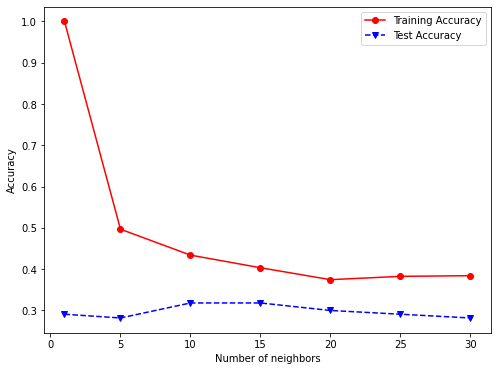

In [37]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.3 , Difference =  70.0 %
K =  5 , Training Accuracy =  0.5064308681672026  Test Accuracy =  0.2818181818181818 , Difference =  22.461268634902083 %
K =  10 , Training Accuracy =  0.454983922829582  Test Accuracy =  0.3090909090909091 , Difference =  14.589301373867292 %
K =  15 , Training Accuracy =  0.4003215434083601  Test Accuracy =  0.32727272727272727 , Difference =  7.3048816135632855 %
K =  20 , Training Accuracy =  0.38263665594855306  Test Accuracy =  0.3181818181818182 , Difference =  6.4454837766734885 %
K =  25 , Training Accuracy =  0.364951768488746  Test Accuracy =  0.2636363636363636 , Difference =  10.131540485238238 %
K =  30 , Training Accuracy =  0.35691318327974275  Test Accuracy =  0.3090909090909091 , Difference =  4.782227418883367 %


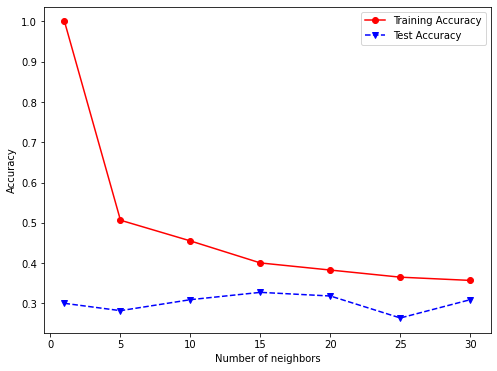

In [38]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [39]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  0.4517684887459807
Test Accuracy:  0.4

Logistic Regression with L2 regularization
Train Accuracy:  0.4405144694533762
Test Accuracy:  0.39090909090909093


In [40]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.3360128617363344
Test Accuracy:  0.39090909090909093


In [41]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.3954983922829582
Test Accuracy:  0.3090909090909091


In [42]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.33440514469453375
Test Accuracy:  0.33636363636363636


In [43]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[13 16  0  0  0]
 [12 24  0  0  0]
 [ 5 14  0  0  0]
 [14  3  0  0  0]
 [ 2  7  0  0  0]]

Classification Report
                   precision    recall  f1-score   support

             Mild      0.283     0.448     0.347        29
         Moderate      0.375     0.667     0.480        36
Moderately Severe      0.000     0.000     0.000        19
             None      0.000     0.000     0.000        17
           Severe      0.000     0.000     0.000         9

         accuracy                          0.336       110
        macro avg      0.132     0.223     0.165       110
     weighted avg      0.197     0.336     0.248       110



In [44]:
# from sklearn.metrics import plot_roc_curve
# clf = SVC(gamma = 'auto', random_state = 0)
# clf.fit(X_train, y_train)
# metrics.plot_roc_curve(clf, X_test, y_test)